In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
sklearn

<module 'sklearn' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/__init__.py'>

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr=LinearRegression()

In [7]:
from sklearn import datasets

In [8]:
data=datasets.fetch_california_housing()

In [9]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
inputs=data.data

In [13]:
outputs=data.target

In [14]:
outputs

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [17]:
lr.fit(inputs,outputs)

LinearRegression()

In [18]:
LinearRegression(copy_X=True,n_jobs=-1)
## 1 for the single core and -1 for the all cores should be utilised

LinearRegression(n_jobs=-1)

In [25]:
predictions=lr.predict(inputs)

In [26]:
inputs.shape

(20640, 8)

### lr.predict() method will take the two dimentional array as the input

In [27]:
loss=pd.Series(data.target-predictions)

In [28]:
loss

0        0.394350
1       -0.391606
2       -0.155571
3        0.171402
4        1.008413
           ...   
20635    0.647344
20636    0.217472
20637    0.751749
20638    0.527895
20639    0.378196
Length: 20640, dtype: float64

<Axes: >

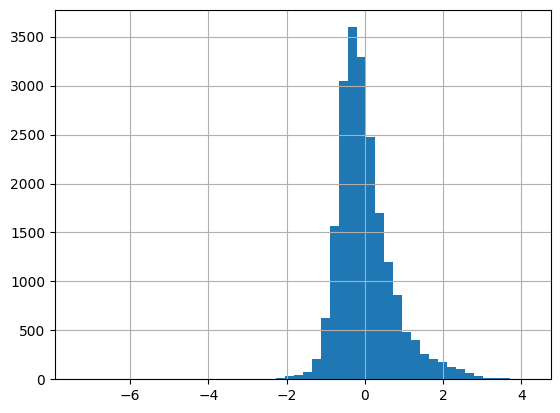

In [33]:
loss.hist(bins=50)

In [36]:
LinearRegression(copy_X=True,n_jobs=1)

LinearRegression(n_jobs=1)

In [39]:
from scipy.stats import probplot

In [42]:
f=plt.figure(figsize=(10,10))
probplot(outputs-data.target)

((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (0.0, 0.0, 0.0))

<Figure size 1000x1000 with 0 Axes>

In [43]:
ax=f.add_subplot(111)

In [45]:
tuple_out=probplot(outputs-data.target,plot=ax)

In [47]:
tuple_out[0]

(array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
         3.7703327 ,  3.98611384]),
 array([0., 0., 0., ..., 0., 0., 0.]))

## Two major mathods to calculate the loss
* MEA-Mean Square error
* MAD-Mean Absolute Deviation

In [51]:
def MSE(predictions,targets):
    mse=np.power(targets-predictions,2)
    return np.mean(mse)

In [50]:
def MAD(predictions,targets):
    mad=np.abs(targets-predictions)
    return np.mean(mad)

In [57]:
MSE(predictions,outputs)

0.5243209861846072

In [58]:
MAD(predictions,outputs)

0.5311643817546468

## similar Sklearn methods are

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
mean_squared_error(predictions,outputs)

0.5243209861846072

In [63]:
mean_absolute_error(predictions,outputs)

0.5311643817546468

## Mean Absolute Error(MAD):

    The mean of the absolute difference between the predicted value and the actual value
    

## Mean Squared Error(MSE):

        The mean of the squared difference betweent he predicted values and the actual values

In [65]:
lr.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [68]:
lr.intercept_

-36.941920207184474

In [69]:
lr.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [70]:
lr.intercept_

-36.941920207184474

## Calculating the uncertainity of the model by bootstraping 

In [71]:
n_bootstrap=1000
len_bootstraping=len(outputs)

In [73]:
sub_samplesize=0.5*len_bootstraping

In [75]:
int(sub_samplesize)

10320

## Ridge lineaRegression 
* which was used in collinear functions such as x^2 and x^3 etc